# Neural network

Data set taken from Udacity nanodegree. This code build a neural network function that create, train and predict the use of bicycles in a given day




In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Bike-Sharing-Dataset/hour.csv')

In [4]:
dataset.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


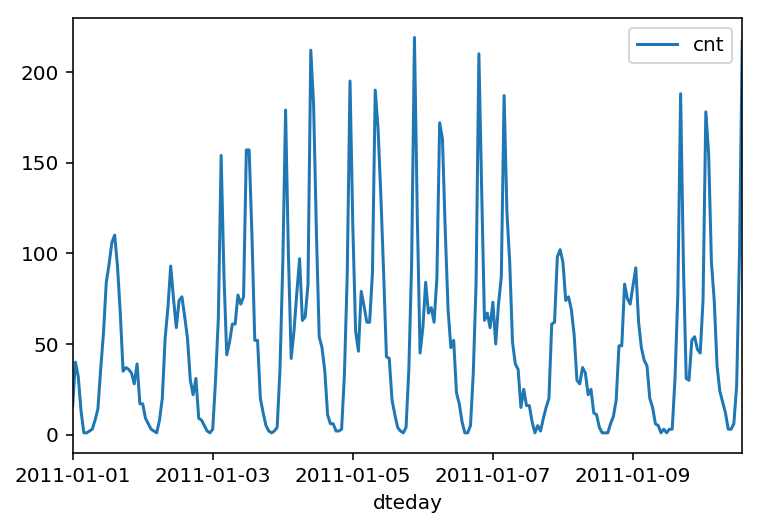

In [7]:
dataset[:24*10].plot(x = 'dteday', y = 'cnt')


In [14]:
for column in dataset.columns:
    print('Valores únicos de: ' + column + '\n')
    print(dataset[column].unique())

Valores únicos de: instant

[    1     2     3 ..., 17377 17378 17379]
Valores únicos de: dteday

['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-29' '2011-01-30'
 '2011-01-31' '2011-02-01' '2011-02-02' '2011-02-03' '2011-02-04'
 '2011-02-05' '2011-02-06' '2011-02-07' '2011-02-08' '2011-02-09'
 '2011-02-10' '2011-02-11' '2011-02-12' '2011-02-13' '2011-02-14'
 '2011-02-15' '2011-02-16' '2011-02-17' '2011-02-18' '2011-02-19'
 '2011-02-20' '2011-02-21' '2011-02-22' '2011-02-23' '2011-02-24'
 '2011-02-25' '2011-02-26' '2011-02-27' '2011-02-28' '2011-03-01'
 '2011-03-02' '2011-03-03' '2011-03-04' '2011-03-05' '2011-03-06'
 '2011-03-07' '2011-03-08' '2011-03-09' '201

In [17]:
# based on the unique values, we identify the categorical values and turn them into dummies.
# note: categorical with only two values are not transformed
dummyCols = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
for dCol in dummyCols:
    dummyCol = pd.get_dummies(dataset[dCol], drop_first=False, prefix=dCol)
    dataset = pd.concat([dataset, dummyCol], axis = 1)
    
# remove cols that were transformed into dummies
dataset = dataset.drop(dummyCols, axis = 1)

dataset.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,3,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,8,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,5,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,3,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0,0,...,0,0,0,0,0,1,1,0,0,0


In [18]:
dataset.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,...,0.142643,0.141147,0.142413,0.142183,0.143104,0.144542,0.656712,0.261465,0.081650,0.000173
std,5017.0295,0.500008,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,...,0.349719,0.348184,0.349484,0.349248,0.350189,0.351649,0.474820,0.439445,0.273839,0.013138
min,1.0000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4345.5000,0.000000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8690.0000,1.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,13034.5000,1.000000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,17379.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Normalize numerical features

In [25]:
numericalColumns = ['casual', 'registered', 'cnt', 'temp', 'atemp', 'hum', 'windspeed']

dataset[numericalColumns] = (dataset[numericalColumns] - dataset[numericalColumns].mean()) / dataset[numericalColumns].std()

### Separate in Training and Testing dataset

In [59]:
testData = dataset[-24*21:] # the last 21 days until the end of the dataset

NOTTrainingCols = ['instant', 'casual', 'registered', 'cnt']

trainFeatures, trainTargets = dataset.drop(NOTTrainingCols, axis = 1), dataset['cnt'] 
testFeatures, testTarget = testData.drop(NOTTrainingCols, axis = 1), testData['cnt'] 


### Begin Neural Network Class Construction

In [34]:
class caioNeuralNetwork:
    def __init__(self, nbrInputs, nbrNeuronsHiddenLayer, nbrOutputs, lr = 0.05):
        # initialize weights so explained here: http://cs231n.github.io/neural-networks-2/#init
        self.input_to_hidden_weights = np.random.normal(0.0, (1/nbrInputs**0.5),
                                                       (nbrInputs,nbrNeuronsHiddenLayer))
        self.hidden_to_output_weights = np.random.normal(0.0, (1/nbrNeuronsHiddenLayer**0.5),
                                                       (nbrNeuronsHiddenLayer,nbrOutputs))
        self.lr = lr
        
        # sigmoid transformation and its derivative (try with other activation functions?)
        self.sigmoid = lambda(x) : 1/(1 + np.exp(-x))
        self.sigmoidPrime = lambda(x) : self.sigmoid(x) * (1 - self.sigmoid(x))
        ##################################################################################
        
    # implement Mini Batch Stochastic Gradient Descendent
    def train(self, features, targets, nbrIteractions = 5000, iteractionSampleSize = 128):
        # features = MxN matrix
        # targets = 1xM matrix
        
        # add bias to features - include bias after validating the nn is working
        #features.insert(0,'bias',1)
        
        #initialize empty delta_weights
        delta_weights_i_h = np.zeros(input_to_hidden_weights.shape)
        delta_weights_h_o = np.zeros(hidden_to_output_weights.shape)
        for i in list(range(nbrIteractions)):
            
            ######## create mini batch
            miniBatchIndices = np.random.choice(features.index)
            
            trainMiniBatchSample = trainFeatures.iloc[np.random.choice(features.index)]
            targetMiniBatchSample = targets.iloc[np.random.choice(features.index)]
                        
            ######## forward pass            
            
            hiddenInputs = features * self.input_to_hidden_weights
            hiddenOutputs = self.sigmoid(hiddenInputs) # hidden outputs = MxH matrix
            
            # regression = there is no non-linear transformation at the end
            output = hiddenOutputs * self.hidden_to_output_weights
            
            ######## backwards pass
            
            # output to hidden
            delta_error_output = (output - targetMiniBatchSample) * 1 # derivative of activation function
            delta_weights_h_o = delta_error_output * hiddenOutputs
            
            # hidden to input
            
            
            

SyntaxError: unexpected EOF while parsing (<ipython-input-34-94fbd0081b41>, line 3)

In [132]:
## how to concat bias in the dataframe
#pd.concat([trainFeatures, np.repeat(a=1, repeats=trainFeatures.shape[0])[:,None]])
#

sigmoid(-0.5)

0.37754066879814541

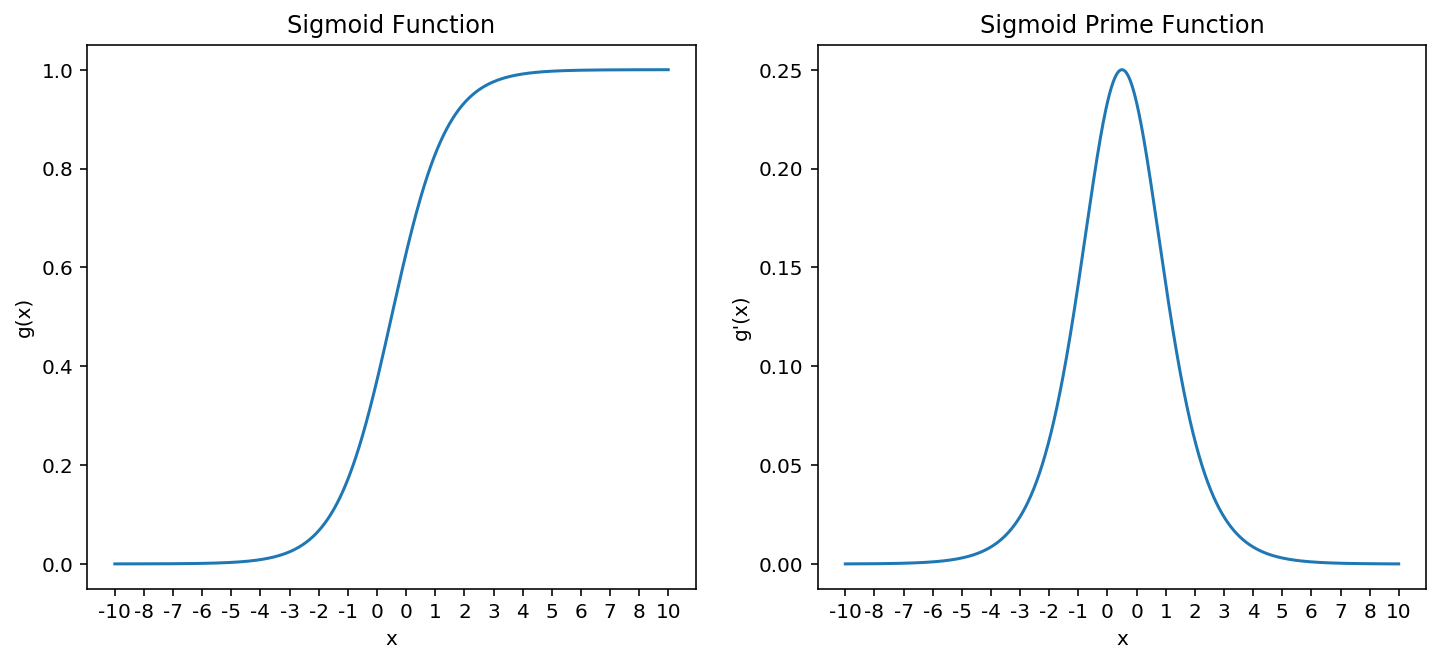

In [122]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

values = np.linspace(-10,10,5000)


###### plot parameters
plt.rcParams["figure.figsize"] = [12,5]

xticksIndex = np.linspace(0,len(values),20)
xticksValues = (np.linspace(-10,10,20)).astype(int)

###### sigmoid function

plt.figure(1)
plt.subplot(121)

sigmoidSignal = sigmoid(values)

plt.plot(sigmoidSignal)
plt.xticks(xticksIndex,xticksValues)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Sigmoid Function')

###### sigmoid prime function

plt.subplot(122)

sigmoidPrime = sigmoid(values) * (1 - sigmoid(values))

plt.plot(sigmoidPrime)
plt.xticks(xticksIndex,xticksValues)
plt.xlabel('x')
plt.ylabel("g'(x)")
plt.title('Sigmoid Prime Function')

plt.show()